In [59]:
import os

print("Current working directory: {0}".format(os.getcwd()))

os.chdir('/Users/amirarya/Desktop/qbio_490_amir/ANALYSIS_DATA')

print("New working directory: {0}".format(os.getcwd()))

Current working directory: /Users/amirarya/Desktop/qbio_490_amir/analysis_data
New working directory: /Users/amirarya/Desktop/qbio_490_amir/analysis_data


In [178]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import cptac
import numpy as np
import pandas as pd

In [61]:
# getting data and packages, elbow plot then (k-mean) clustring, end up with x amount of clusters for protnomic data. (read in rna data)
#create three groups of patients 

In [62]:
brca_rna_count.head()
brca_rna_clinical.head()

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,tumor_descriptor,sample_id,sample_type,...,paper_Mutation.Clusters,paper_DNA.Methylation.Clusters,paper_mRNA.Clusters,paper_miRNA.Clusters,paper_lncRNA.Clusters,paper_Protein.Clusters,paper_PARADIGM.Clusters,paper_Pan.Gyn.Clusters,age_category,five_year_surv
TCGA-EW-A1PB-01A-11R-A144-07,TCGA-EW-A1PB-01A-11R-A144-07,TCGA-EW-A1PB,TCGA-EW-A1PB-01A,TP,Primary solid Tumor,TCGA-EW-A1PB-01A,1,Not Reported,da9dc40b-0350-4b8c-8a7a-15100d5aeb90,Primary Tumor,...,C1,C4,C4,C7,C3,C5,C4,C3,Old,False
TCGA-E2-A10E-01A-21R-A10J-07,TCGA-E2-A10E-01A-21R-A10J-07,TCGA-E2-A10E,TCGA-E2-A10E-01A,TP,Primary solid Tumor,TCGA-E2-A10E-01A,1,Not Reported,30ce2884-2ce3-4d6a-b758-17a554d6238c,Primary Tumor,...,NaN,C1,C1,C3,C3,C1,C5,C1,Old,False
TCGA-D8-A1JB-01A-11R-A13Q-07,TCGA-D8-A1JB-01A-11R-A13Q-07,TCGA-D8-A1JB,TCGA-D8-A1JB-01A,TP,Primary solid Tumor,TCGA-D8-A1JB-01A,1,Not Reported,940d64bd-8c96-476f-84f9-678d1ed3500f,Primary Tumor,...,C1,C1,C2,C3,C1,C1,C6,C1,Old,False
TCGA-AR-A5QN-01A-12R-A28M-07,TCGA-AR-A5QN-01A-12R-A28M-07,TCGA-AR-A5QN,TCGA-AR-A5QN-01A,TP,Primary solid Tumor,TCGA-AR-A5QN-01A,1,Not Reported,3e936c86-fbb5-415d-a657-f96fe5565e34,Primary Tumor,...,C7,C2,C2,C2,NaN,C1,C6,C1,Old,False
TCGA-LL-A50Y-01A-11R-A266-07,TCGA-LL-A50Y-01A-11R-A266-07,TCGA-LL-A50Y,TCGA-LL-A50Y-01A,TP,Primary solid Tumor,TCGA-LL-A50Y-01A,1,Not Reported,cc10feb5-ced7-4c1e-b429-c4ac77236765,Primary Tumor,...,C4,C1,C2,C2,NaN,C1,C8,C1,Old,False


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()

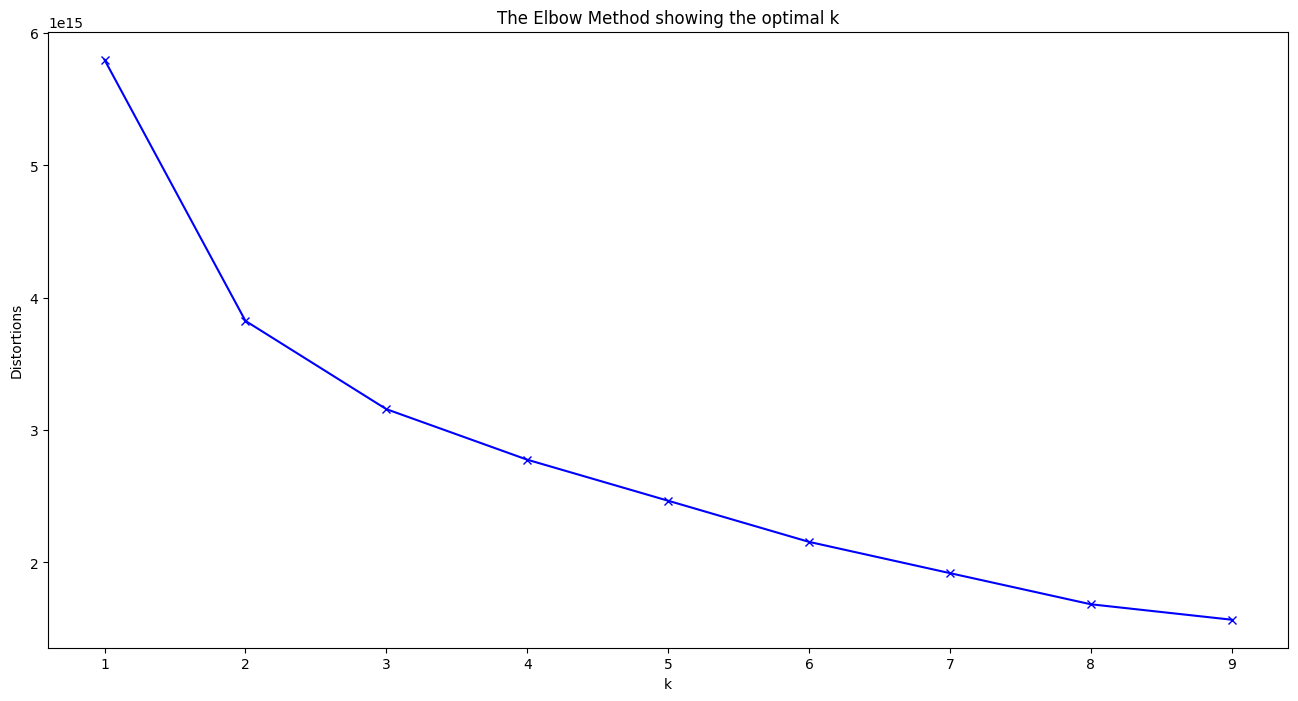

In [138]:
brca_rna_count = pd.read_csv("/Users/amirarya/Desktop/qbio_490_amir/brca_rna_count_data.csv", index_col = 0)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(brca_rna_count)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow Method showing the optimal k')
plt.show()

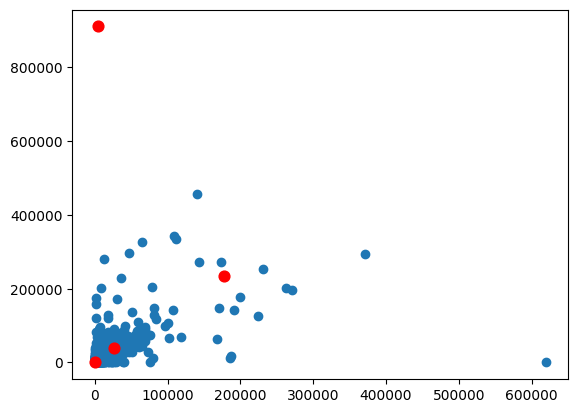

In [190]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=60, n_init=10, random_state=0)
brca_rna_count = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='red')
plt.show()

In [171]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
brca_rna_clinical

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,tumor_descriptor,sample_id,sample_type,...,paper_Mutation.Clusters,paper_DNA.Methylation.Clusters,paper_mRNA.Clusters,paper_miRNA.Clusters,paper_lncRNA.Clusters,paper_Protein.Clusters,paper_PARADIGM.Clusters,paper_Pan.Gyn.Clusters,age_category,five_year_surv
TCGA-EW-A1PB-01A-11R-A144-07,TCGA-EW-A1PB-01A-11R-A144-07,TCGA-EW-A1PB,TCGA-EW-A1PB-01A,TP,Primary solid Tumor,TCGA-EW-A1PB-01A,1,Not Reported,da9dc40b-0350-4b8c-8a7a-15100d5aeb90,Primary Tumor,...,C1,C4,C4,C7,C3,C5,C4,C3,Old,False
TCGA-E2-A10E-01A-21R-A10J-07,TCGA-E2-A10E-01A-21R-A10J-07,TCGA-E2-A10E,TCGA-E2-A10E-01A,TP,Primary solid Tumor,TCGA-E2-A10E-01A,1,Not Reported,30ce2884-2ce3-4d6a-b758-17a554d6238c,Primary Tumor,...,NaN,C1,C1,C3,C3,C1,C5,C1,Old,False
TCGA-D8-A1JB-01A-11R-A13Q-07,TCGA-D8-A1JB-01A-11R-A13Q-07,TCGA-D8-A1JB,TCGA-D8-A1JB-01A,TP,Primary solid Tumor,TCGA-D8-A1JB-01A,1,Not Reported,940d64bd-8c96-476f-84f9-678d1ed3500f,Primary Tumor,...,C1,C1,C2,C3,C1,C1,C6,C1,Old,False
TCGA-AR-A5QN-01A-12R-A28M-07,TCGA-AR-A5QN-01A-12R-A28M-07,TCGA-AR-A5QN,TCGA-AR-A5QN-01A,TP,Primary solid Tumor,TCGA-AR-A5QN-01A,1,Not Reported,3e936c86-fbb5-415d-a657-f96fe5565e34,Primary Tumor,...,C7,C2,C2,C2,NaN,C1,C6,C1,Old,False
TCGA-LL-A50Y-01A-11R-A266-07,TCGA-LL-A50Y-01A-11R-A266-07,TCGA-LL-A50Y,TCGA-LL-A50Y-01A,TP,Primary solid Tumor,TCGA-LL-A50Y-01A,1,Not Reported,cc10feb5-ced7-4c1e-b429-c4ac77236765,Primary Tumor,...,C4,C1,C2,C2,NaN,C1,C8,C1,Old,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0EI-01A-11R-A115-07,TCGA-BH-A0EI-01A-11R-A115-07,TCGA-BH-A0EI,TCGA-BH-A0EI-01A,TP,Primary solid Tumor,TCGA-BH-A0EI-01A,1,Not Reported,4a4d5c63-8e41-487d-839a-f68f28ab9b82,Primary Tumor,...,C4,C1,C1,C3,C1,C1,C5,C1,Old,True
TCGA-A8-A06Y-01A-21R-A00Z-07,TCGA-A8-A06Y-01A-21R-A00Z-07,TCGA-A8-A06Y,TCGA-A8-A06Y-01A,TP,Primary solid Tumor,TCGA-A8-A06Y-01A,1,Not Reported,dac9090c-fae9-4d99-b5d7-fc3c8b6a201a,Primary Tumor,...,C2,C1,C1,C3,C3,C1,C5,C1,Old,False
TCGA-AN-A0FN-01A-11R-A034-07,TCGA-AN-A0FN-01A-11R-A034-07,TCGA-AN-A0FN,TCGA-AN-A0FN-01A,TP,Primary solid Tumor,TCGA-AN-A0FN-01A,1,Not Reported,c7da9758-e55a-4ed7-984f-cd86e2f6ea20,Primary Tumor,...,C1,C1,C2,C3,NaN,NaN,C6,NaN,Old,False
TCGA-A2-A0EU-01A-22R-A056-07,TCGA-A2-A0EU-01A-22R-A056-07,TCGA-A2-A0EU,TCGA-A2-A0EU-01A,TP,Primary solid Tumor,TCGA-A2-A0EU-01A,1,Not Reported,69dbb2ae-3f19-4c29-9c24-810ae60312f3,Primary Tumor,...,C7,C1,C1,C3,C2,C2,C5,C1,Old,False


In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

clinical_rna_def = pd.read_csv("/Users/amirarya/Desktop/qbio_490_amir/brca_rna_clincial_data.csv", index_col = 0)
clinical_amir = {'Barcode':clinical_rna_def.loc[:, "barcode"],'Stage':clinical_rna_def.loc[:, "paper_pathologic_stage"]}
target_df = pd.DataFrame(clinical_amir, columns=['Barcode','Stage'])
barcode_dict = pd.Series(target_df.Stage.values,index=target_df.Barcode).to_dict()

count_of_rna = pd.read_csv("/Users/amirarya/Desktop/qbio_490_amir/brca_rna_count_data.csv", index_col = 0)
count_of_rna = count_of_rna.iloc[:, 2:len(count_of_rna.columns)]

count_of_rna = count_of_rna.T
count_of_rna['barcodes'] = count_of_rna.index
count_of_rna['stage'] = count_of_rna['barcodes'].map(barcode_dict)
count_of_rna = count_of_rna.drop(['barcodes'],axis =1)

count_of_rna = count_of_rna.dropna(axis="rows")

In [ ]:

x = count_of_rna.loc[:, count_of_rna.columns != 'stage'].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components = 2)
Prinicipal_components = pca.fit_transform(x)
principalDf = pd.DataFrame(data = Prinicipal_components, columns = ['Principal_components 1', 'Principal_components 2'])

principalDf['stage'] = count_of_rna['stage'].values

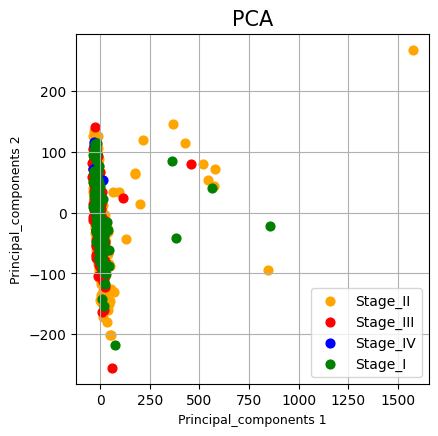

In [195]:


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,2) 
ax.set_xlabel('Principal_components 1', fontsize = 9)
ax.set_ylabel('Principal_components 2', fontsize = 9)
ax.set_title('PCA', fontsize = 15)
targets = pd.unique(principalDf.loc[:, "stage"])
colors = ['orange', 'red', 'blue', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['stage'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'Principal_components 1']
               , principalDf.loc[indicesToKeep, 'Principal_components 2']
               , c = color
               , s = 40)
ax.legend(targets)
ax.grid()

In [196]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


<function matplotlib.pyplot.show(close=None, block=None)>

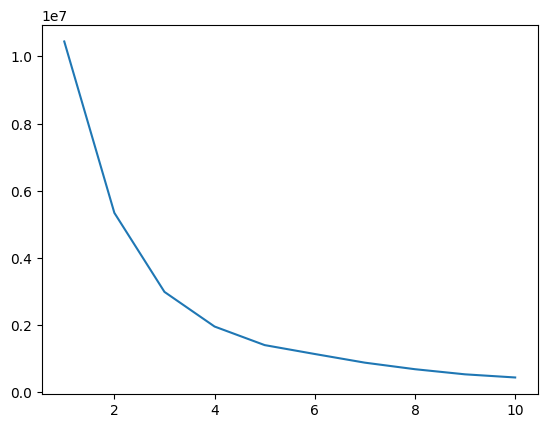

In [202]:
cpa = []

for m in range(1, 11):
    kmeans = KMeans(n_clusters = m, init = 'k-means++', max_iter = 300, n_init = 11, random_state = 0)
    kmeans.fit(Prinicipal_components)
    cpa.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cpa)
plt.show

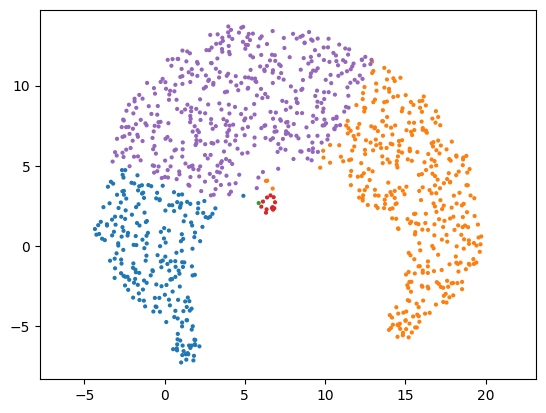

In [214]:

dataK = principalDf.iloc[:, :-1]
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
prediction = kmeans.fit_predict(dataK)

import umap.umap_ as umap

umap_x = umap.UMAP(n_neighbors = 30, min_dist = 1)
refined = umap_x.fit_transform(dataK)
plt.scatter(refined[:, 0], refined[:, 1], s = 4, c = [sns.color_palette()[data] for data in prediction])

plt.gca().set_aspect('equal', 'datalim')
plt.show()

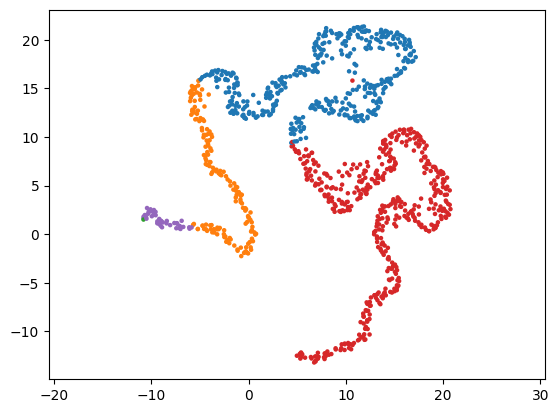

In [219]:
count_of_rna = count_of_rna.dropna(axis="columns")
gene_data = {'gene_1':count_of_rna.iloc[:, 0],'gene_2':count_of_rna.iloc[:, 1]}
gene_df = pd.DataFrame(gene_data, columns=['gene_1','gene_2'])
prediction = kmeans.fit_predict(gene_df)

umap_var = umap.UMAP(n_neighbors = 20, min_dist = 1)
refined = umap_var.fit_transform(gene_df)
plt.scatter(refined[:, 0], refined[:, 1], s = 5, c = [sns.color_palette()[data] for data in prediction])

plt.gca().set_aspect('equal', 'datalim')
plt.show()